In [1]:
#Gonna have to do attribute analysis first, then I can do statistical analysis later. 
#loading the data into the spreadsheet
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

# Replace 'file_path' with the actual file path of your CSV file
winger_file_path = '/Users/JumpMan/Desktop/FM_Analytics_Project_Feb_2024/FM24_Player_Database/Arsenal_FM24_Save/Attributes/csv/Winger_attributes.csv'

# Load the CSV file into a DataFrame
winger_df = pd.read_csv(winger_file_path)

# Display the first few rows of the DataFrame
winger_df.head()


,UID,Name,Club,Position,Age,New Transfer Value,Salary,Off The Ball,Stamina,Balance,...,Composure,Technique,Passing,Dribbling,Finishing,Pace,Acceleration,Crossing,Agility,First Touch
0,28054109.0,Raheem Sterling - English,Chelsea - English Premier Division,M/AM (RL),29.0,"£289,500,000.00","£350,000.00",20.0,18.0,14.0,...,12.0,13.0,13.0,15.0,13.0,15.0,17.0,13.0,18.0,13.0
1,28108494.0,Phil Foden - English,Man City - English Premier Division,"M (C), AM (RLC)",24.0,"£255,000,000.00","£205,000.00",16.0,15.0,15.0,...,15.0,17.0,17.0,17.0,14.0,16.0,16.0,13.0,17.0,17.0
2,29232937.0,Jude Bellingham - English,R. Madrid - Spanish First Division,"DM, M/AM (C)",20.0,"£227,500,000.00","£350,000.00",17.0,16.0,15.0,...,17.0,17.0,16.0,17.0,14.0,15.0,16.0,12.0,16.0,16.0
3,67197125.0,Marco Asensio - Spanish,Paris SG - Ligue 1 Uber Eats,AM (RLC),28.0,"£212,500,000.00","£115,000.00",13.0,14.0,13.0,...,14.0,17.0,16.0,16.0,15.0,15.0,15.0,15.0,15.0,17.0
4,78090138.0,Darwin Núñez - Uruguayan,Liverpool - English Premier Division,"AM (RL), ST (C)",24.0,"£226,500,000.00","£250,000.00",18.0,15.0,12.0,...,12.0,14.0,12.0,14.0,15.0,17.0,17.0,13.0,14.0,12.0


In [3]:
print(winger_df.columns)

Index(['UID', 'Name', 'Club', 'Position', 'Age', 'New Transfer Value ',
       'Salary', 'Off The Ball', 'Stamina', 'Balance', 'Workrate', 'Composure',
       'Technique', 'Passing', 'Dribbling', 'Finishing', 'Pace',
       'Acceleration', 'Crossing', 'Agility', 'First Touch'],
      dtype='object')


In [6]:
#Calculator
#Calculator Stuff
winger_df['winger_key']= ((
    winger_df['Crossing'] + 
    winger_df['Dribbling'] + 
    winger_df['Technique'] + 
    winger_df['Acceleration'] + 
    winger_df['Agility'] + 
    winger_df['Pace'] + 
    winger_df['Finishing'] 
) * 5)



winger_df['winger_important'] = ((
    winger_df['First Touch'] + 
    winger_df['Passing'] + 
    winger_df['Off The Ball'] + 
    winger_df['Workrate'] + 
    winger_df['Balance'] + 
    winger_df['Stamina']
) * 4)





winger_df['winger_score'] = ((winger_df['winger_key'] + winger_df['winger_important']) / 59)
winger_df['winger_score'] = winger_df['winger_score'].round(1)


/var/folders/bf/4lyx7mbx6_x3y4pb5d93fm7h0000gp/T/ipykernel_6831/3017010940.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')


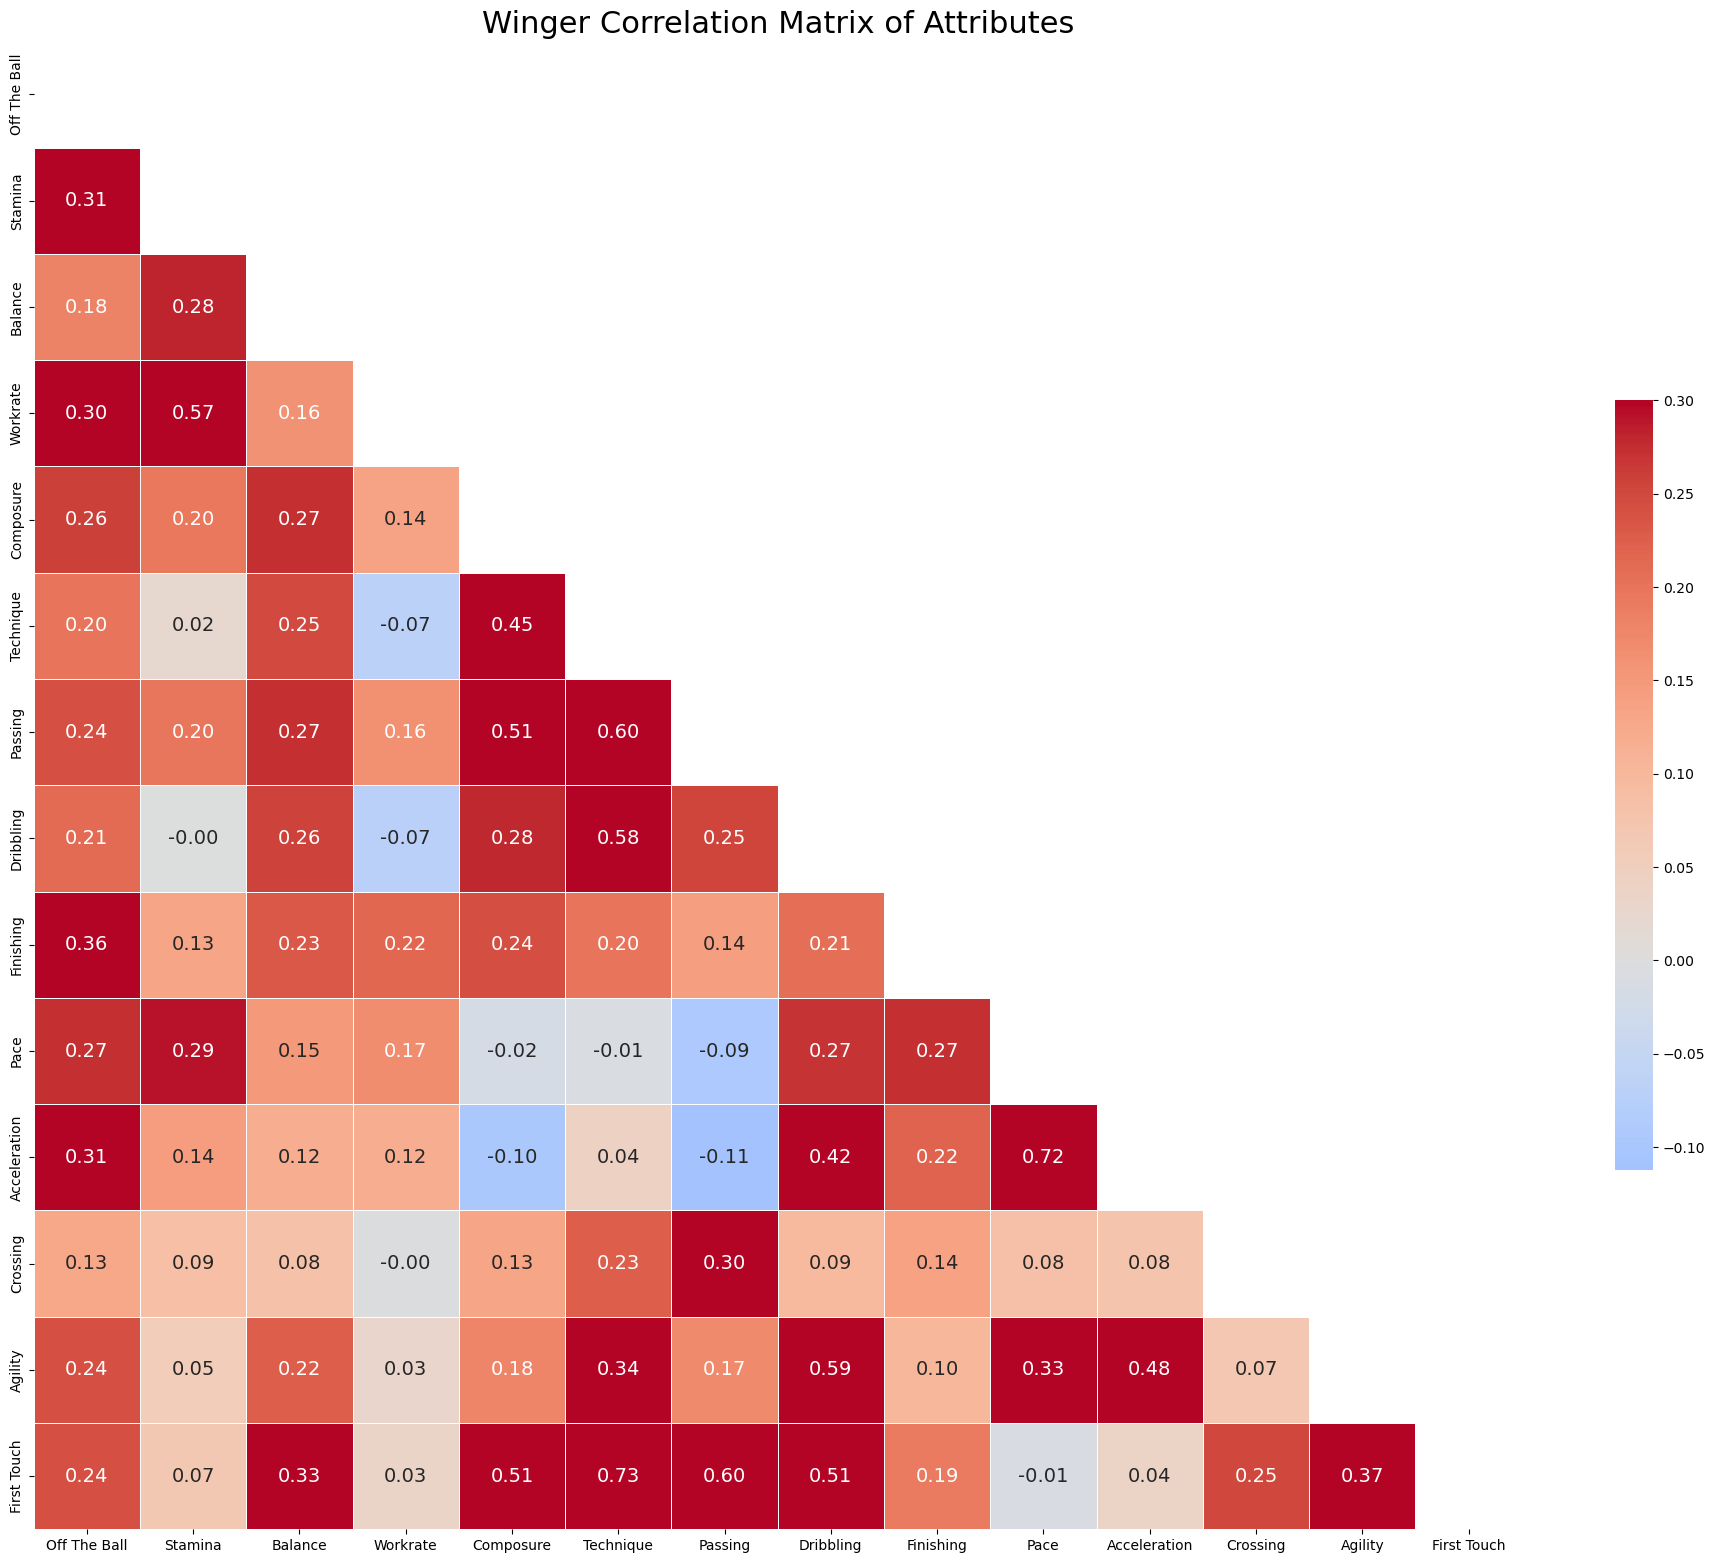

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select the columns of interest
attributes = [ 'Off The Ball', 'Stamina', 'Balance', 'Workrate', 'Composure',
       'Technique', 'Passing', 'Dribbling', 'Finishing', 'Pace',
       'Acceleration', 'Crossing', 'Agility', 'First Touch']

# Compute the correlation matrix
correlation_matrix = winger_df[attributes].corr()

# Set up the matplotlib figure
plt.figure(figsize=(24, 20))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Generate a custom sequential colormap with varying shades of blue
cmap = plt.cm.get_cmap('coolwarm')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f", annot_kws={"fontsize":14})

plt.title('Winger Correlation Matrix of Attributes', fontsize=22)  # Increase title font size
plt.show()


In [8]:
# Selecting the desired columns from the original DataFrame
selected_columns = ['UID', 'Name', 'Club', 'Age' ,'Position', 'New Transfer Value ', 'Salary', 'Age', 
                    'winger_key', 'winger_important', 'winger_score']

# Creating a new DataFrame with the selected columns from ball_playing_defender_df
new_winger_df = winger_df[selected_columns]

# Displaying the new DataFrame
new_winger_df.head(41)

,UID,Name,Club,Age,Position,New Transfer Value,Salary,Age,winger_key,winger_important,winger_score
0,28054109.0,Raheem Sterling - English,Chelsea - English Premier Division,29.0,M/AM (RL),"£289,500,000.00","£350,000.00",29.0,520.0,372.0,15.1
1,28108494.0,Phil Foden - English,Man City - English Premier Division,24.0,"M (C), AM (RLC)","£255,000,000.00","£205,000.00",24.0,550.0,384.0,15.8
2,29232937.0,Jude Bellingham - English,R. Madrid - Spanish First Division,20.0,"DM, M/AM (C)","£227,500,000.00","£350,000.00",20.0,535.0,392.0,15.7
3,67197125.0,Marco Asensio - Spanish,Paris SG - Ligue 1 Uber Eats,28.0,AM (RLC),"£212,500,000.00","£115,000.00",28.0,540.0,348.0,15.1
4,78090138.0,Darwin Núñez - Uruguayan,Liverpool - English Premier Division,24.0,"AM (RL), ST (C)","£226,500,000.00","£250,000.00",24.0,520.0,340.0,14.6
5,19302146.0,Vinícius Júnior - Brazilian,R. Madrid - Spanish First Division,23.0,"M (L), AM (RL)","£219,000,000.00","£350,000.00",23.0,580.0,368.0,16.1
6,18004457.0,Kevin De Bruyne - Belgian,Man City - English Premier Division,32.0,"M (RLC), AM (C)","£194,000,000.00","£350,000.00",32.0,560.0,372.0,15.8
7,19338230.0,Antony - Brazilian,Man UFC - English Premier Division,24.0,M/AM (R),"£198,000,000.00","£150,000.00",24.0,515.0,368.0,15.0
8,85140301.0,Christopher Nkunku - French,Chelsea - English Premier Division,26.0,"M (C), AM (RLC), ST (C)","£170,500,000.00","£300,000.00",26.0,525.0,340.0,14.7
9,67293495.0,Pedri - Spanish,Barcelona - Spanish First Division,21.0,"M (C), AM (RLC)","£166,000,000.00","£185,000.00",21.0,535.0,376.0,15.4


In [9]:
import pandas as pd

# Creating a new DataFrame with the selected columns from dlp_df
new_winger_df = winger_df[selected_columns]

# Sort the DataFrame based on 'dlp_score' in descending order
new_winger_df = new_winger_df.sort_values(by='winger_score', ascending=False)

# Create an empty string to store the HTML content
html_content = "<h1>Winger Attritube Analysis</h1>"
html_content += "<table border='1'><tr><th>Name</th><th>Club</th><th>Age</th><th>Position</th><th>Transfer Value</th><th>Salary</th><th>Winger Score</th></tr>"

# Iterate over each row in the DataFrame
for index, player in new_winger_df.iterrows():
    # Add a new row to the HTML table
    html_content += f"<tr><td>{player['Name']}</td><td>{player['Club']}</td><td>{player['Age']}</td><td>{player['Position']}</td><td>{player['New Transfer Value ']}</td><td>{player['Salary']}</td><td>{player['winger_score']}</td></tr>"

# Close the HTML table tag
html_content += "</table>"

# Save the HTML content to a file
with open("Winger Attribute Analysis 1st report.html", "w") as file:
    file.write(html_content)

print("HTML report generated successfully.")


HTML report generated successfully.


In [11]:
import pandas as pd

# Assuming you already have the DataFrame 'dlp_df' containing the data

# Group the DataFrame by 'Age' and find the player with the highest 'dlp_score' in each age group
best_winger_by_age = winger_df.groupby('Age').apply(lambda x: x.loc[x['winger_score'].idxmax()])

# Select the desired columns for the report
report_columns = ['Name', 'Club', 'Age', 'Position', 'Transfer Value', 'Salary', 'winger_score']

# Create an HTML report
html_content = "<h1>Best Winger by Age </h1>"
html_content += "<table border='1'><tr><th>Name</th><th>Club</th><th>Age</th><th>Position</th><th>Transfer Value</th><th>Salary</th><th>Winger Score</th></tr>"

# Iterate over each row in the grouped DataFrame
for index, player in best_winger_by_age.iterrows():
    # Add a new row to the HTML table
    html_content += f"<tr><td>{player['Name']}</td><td>{player['Club']}</td><td>{player['Age']}</td><td>{player['Position']}</td><td>{player['New Transfer Value ']}</td><td>{player['Salary']}</td><td>{player['winger_score']}</td></tr>"

# Close the HTML table tag
html_content += "</table>"

# Save the HTML content to a file
with open("best_winger_by_age_report.html", "w") as file:
    file.write(html_content)

print("HTML report generated successfully.")


HTML report generated successfully.


In [12]:
import pandas as pd

# Assuming you already have the DataFrame 'am_df' containing the data

# Filter the DataFrame to include only players who are under 23 years old
u23_players = winger_df[winger_df['Age'] < 23]

# Sort the DataFrame by 'am_score' in descending order to rank the players
u23_players_ranked = u23_players.sort_values(by='winger_score', ascending=False)

# Select the desired columns for the report
report_columns = ['Name', 'Club', 'Age', 'Position', 'Transfer Value', 'Salary', 'winger_score']

# Create an HTML report
html_content = "<h1>Best U23 Wingers </h1>"
html_content += "<table border='1'><tr><th>Name</th><th>Club</th><th>Age</th><th>Position</th><th>Transfer Value</th><th>Salary</th><th>AM Score</th></tr>"

# Iterate over each row in the DataFrame
for index, player in u23_players_ranked.iterrows():
    # Add a new row to the HTML table
    html_content += f"<tr><td>{player['Name']}</td><td>{player['Club']}</td><td>{player['Age']}</td><td>{player['Position']}</td><td>{player['New Transfer Value ']}</td><td>{player['Salary']}</td><td>{player['winger_score']}</td></tr>"

# Close the HTML table tag
html_content += "</table>"

# Save the HTML content to a file
with open("best_u23_winger_report.html", "w") as file:
    file.write(html_content)

print("HTML report generated successfully.")


HTML report generated successfully.
